In [1]:
print('請將檔案放在Google網路硬碟的Colab資料夾內')
print('設定google網路硬碟')
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


請將檔案放在Google網路硬碟的Colab資料夾內
設定google網路硬碟


ModuleNotFoundError: No module named 'google'

In [1]:
# /content/drive/MyDrive/Colab/German_Credit.csv
# /content/drive/MyDrive/Colab/bank_note.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
credit=pd.read_csv('/content/drive/MyDrive/Colab/German_Credit.csv')
print(credit)
print('csv檔案沒有欄位名稱，得加入欄位名稱')
import sys
sys.path.append('/content/drive/MyDrive/Colab/')
import bank_note
credit=pd.read_csv('/content/drive/MyDrive/Colab/German_Credit.csv',names=bank_note.columns)
print(credit)
columns2 = ['customer_id','checking_account_status', 'loan_duration_mo', 'credit_history',
'purpose', 'loan_amount', 'savings_account_balance',
'time_employed_yrs', 'payment_pcnt_income','gender_status',
'other_signators', 'time_in_residence', 'property', 'age_yrs',
'other_credit_outstanding', 'home_ownership', 'number_loans',
'job_category', 'dependents', 'telephone', 'foreign_worker',
'bad_credit']
credit=pd.read_csv('/content/drive/MyDrive/Colab/German_Credit.csv',names=columns2)
print(credit)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
print('第二步、了解檔案內容、查找遺失值與確認欄位的型態。')
print('檔案轉換為網頁，了解檔案內容')
credit.to_html('credit1.html')
print('確認是否有遺失值存在')
print(credit.isnull().any())
print('了解欄位的資料型態')
print(credit.dtypes)
print('先刪除不必要的欄位，例如客戶編號')
try:
  credit.drop(['customer_id'],axis=1,inplace=True)
except:
  pass
print('要如何確保數值資料就是數值欄位?那就嘗試進行轉換吧')
list1=[] #儲存數值欄位
list2=[] #儲存字串欄位
for i in credit.columns:
  if credit[i].dtype==object:
    try:
      print('進行轉換:',i)
      credit[i]=credit[i].astype('float')
      list1.append(i)
      print('轉換成功')
    except:
      list2.append(i)
  else:
   list1.append(i)
print('那些是數值欄位')
print(list1)
print('那些是文字欄位')
print(list2)

第二步、了解檔案內容、查找遺失值與確認欄位的型態。
檔案轉換為網頁，了解檔案內容
確認是否有遺失值存在
customer_id                 False
checking_account_status     False
loan_duration_mo            False
credit_history              False
purpose                     False
loan_amount                 False
savings_account_balance     False
time_employed_yrs           False
payment_pcnt_income         False
gender_status               False
other_signators             False
time_in_residence           False
property                    False
age_yrs                     False
other_credit_outstanding    False
home_ownership              False
number_loans                False
job_category                False
dependents                  False
telephone                   False
foreign_worker              False
bad_credit                  False
dtype: bool
了解欄位的資料型態
customer_id                  int64
checking_account_status     object
loan_duration_mo             int64
credit_history              object
purpose                     object
loa

數值資料有三種圖表方式：直方圖、與y有關的散佈圖、與y有關的相關性顯示


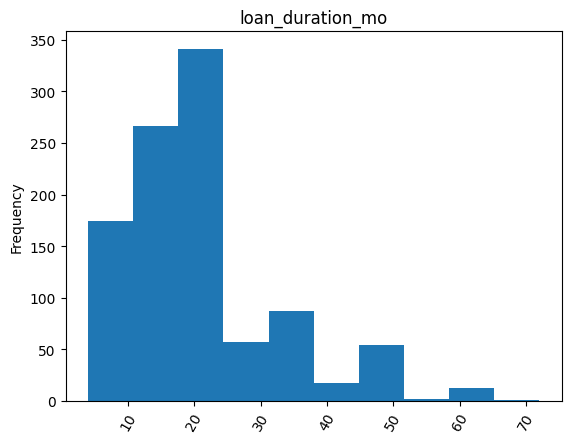

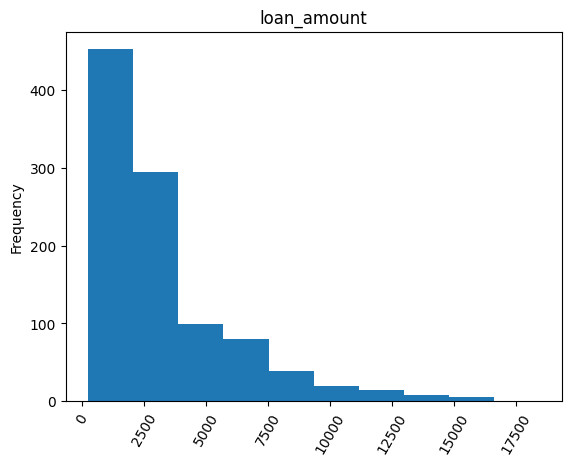

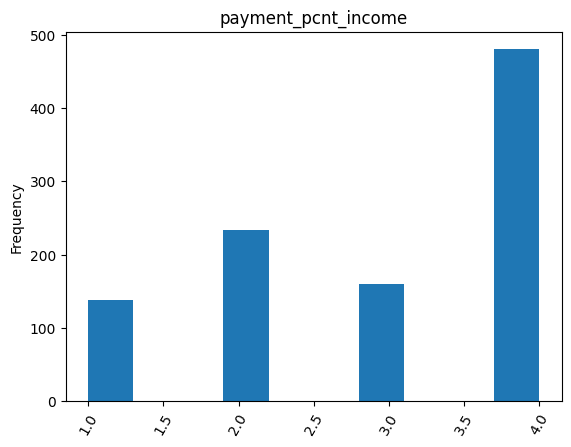

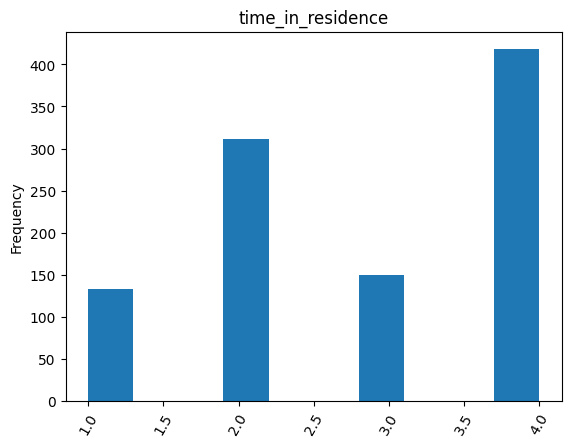

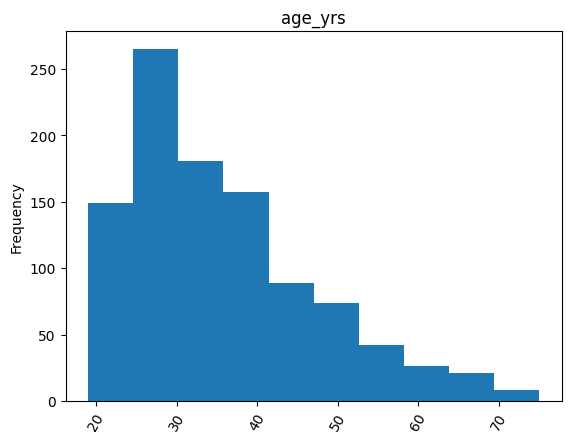

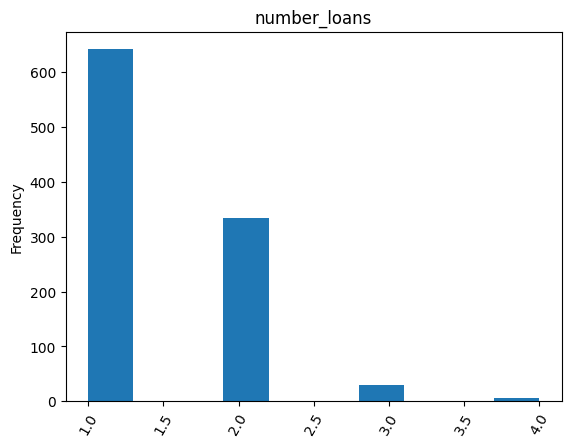

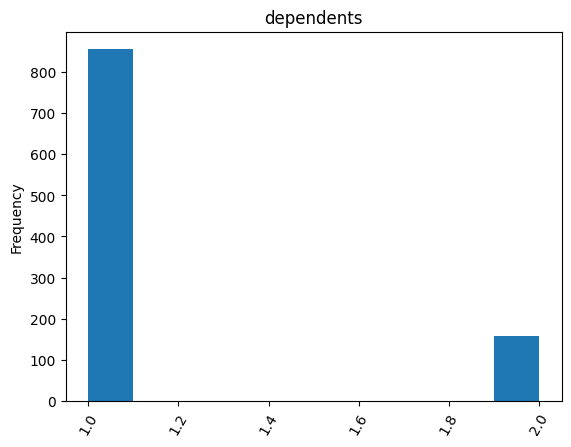

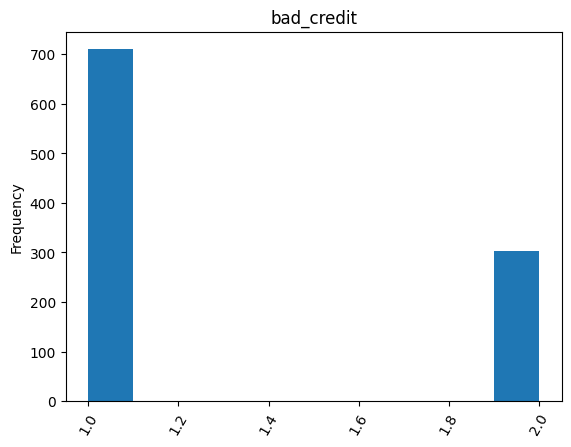

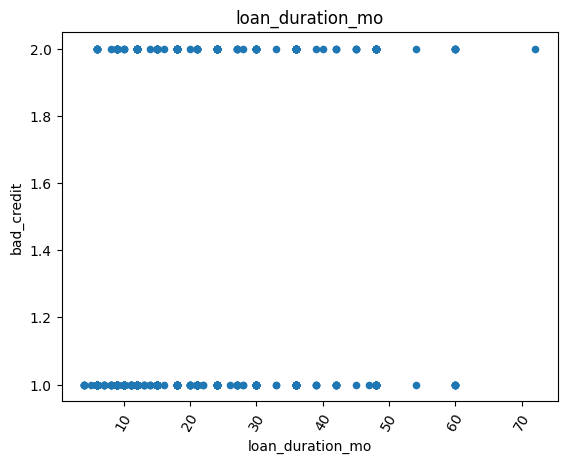

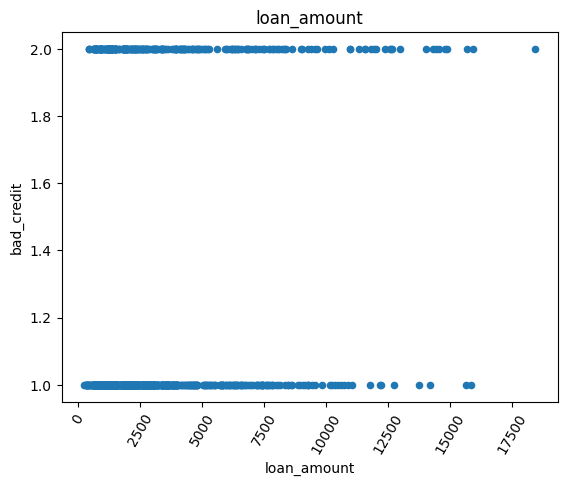

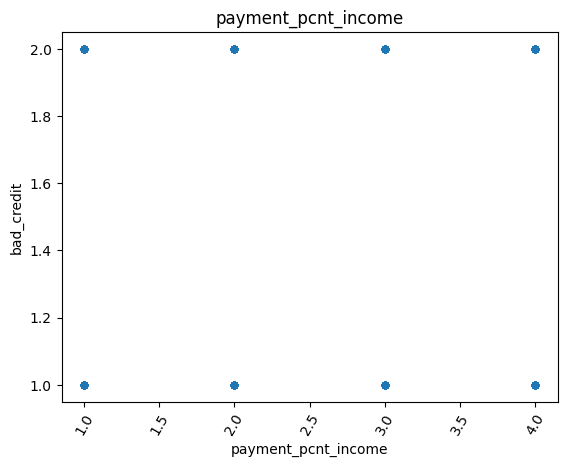

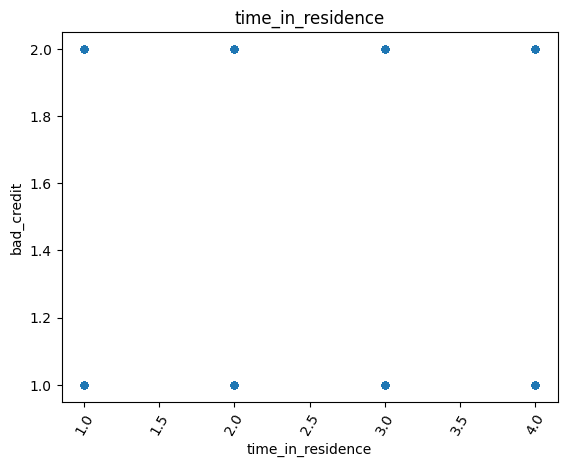

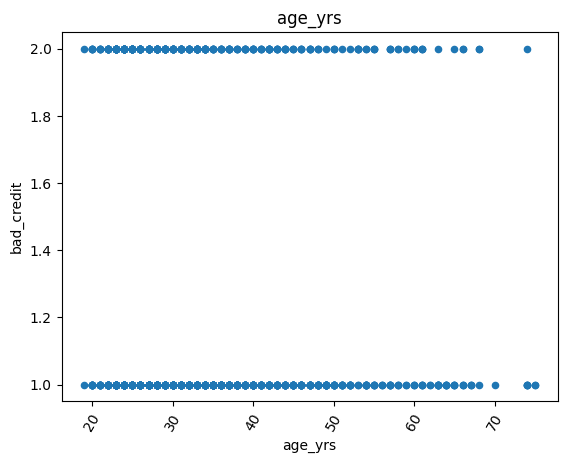

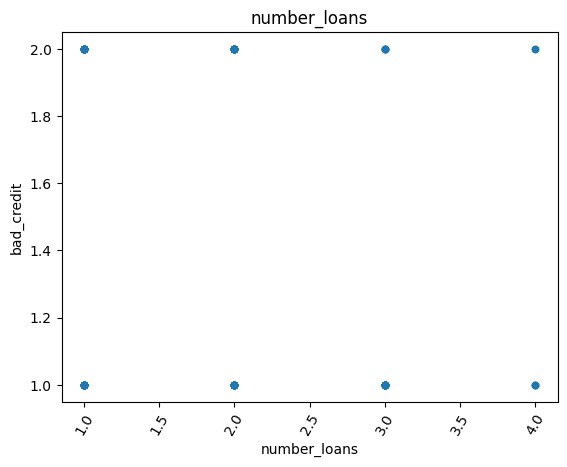

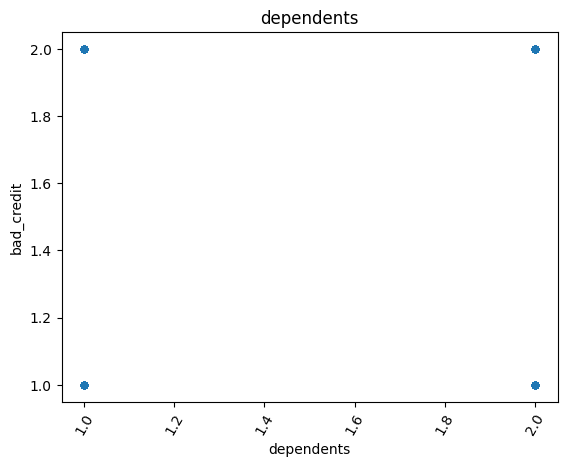

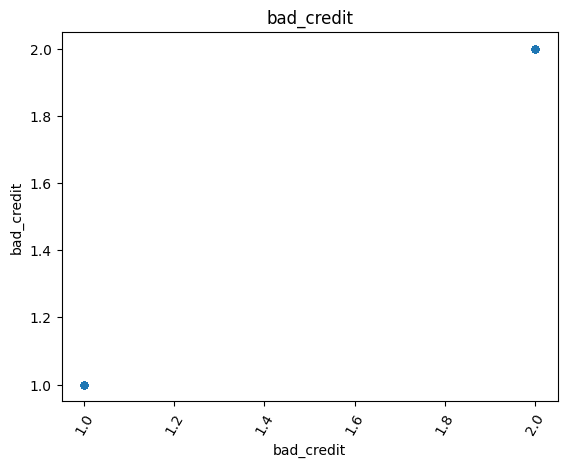

                     loan_duration_mo  loan_amount  payment_pcnt_income  \
loan_duration_mo             1.000000     0.623039             0.074567   
loan_amount                  0.623039     1.000000            -0.271620   
payment_pcnt_income          0.074567    -0.271620             1.000000   
time_in_residence            0.039314     0.032638             0.051410   
age_yrs                     -0.038843     0.033581             0.047998   
number_loans                -0.017961     0.016665             0.020139   
dependents                  -0.025883     0.013894            -0.071637   
bad_credit                   0.216428     0.151932             0.077168   

                     time_in_residence   age_yrs  number_loans  dependents  \
loan_duration_mo              0.039314 -0.038843     -0.017961   -0.025883   
loan_amount                   0.032638  0.033581      0.016665    0.013894   
payment_pcnt_income           0.051410  0.047998      0.020139   -0.071637   
time_in_resi

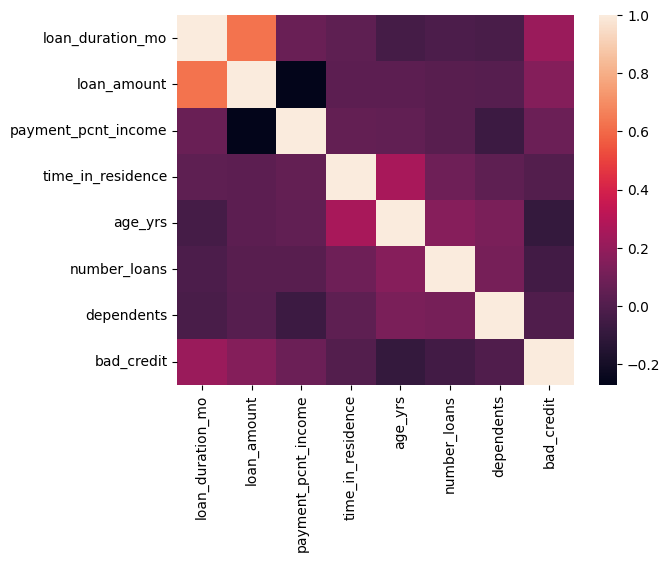

In [ ]:
print('數值資料有三種圖表方式：直方圖、與y有關的散佈圖、與y有關的相關性顯示')
for cols in list1:
  credit[cols].plot(kind='hist',title=cols,rot=60)
  plt.savefig(cols+'.png')
  plt.show()
for cols in list1:
  credit.plot(kind='scatter',title=cols,x=cols,y='bad_credit',rot=60)
  plt.savefig('scatter'+cols+'.png')
  plt.show()
print(credit[list1].corr())
import seaborn as sns
sns.heatmap(credit[list1].corr())
plt.savefig('sns.png')
plt.show()


數值資料於分類操作上不適合用散佈圖進行分析
數值資料於分類操作上於hist也看不出來於不同分類上的差異
['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


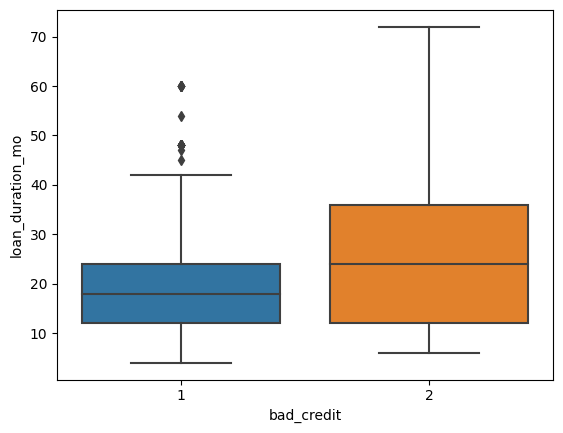

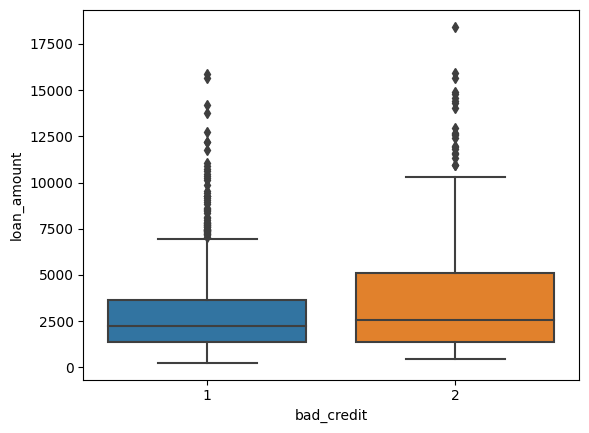

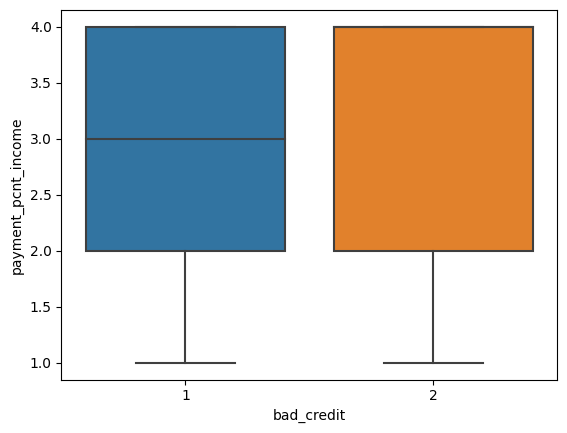

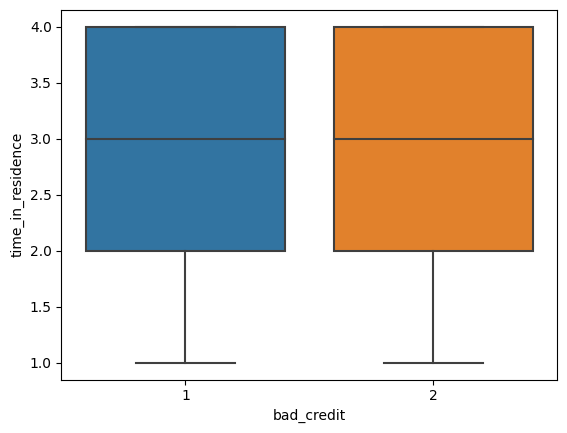

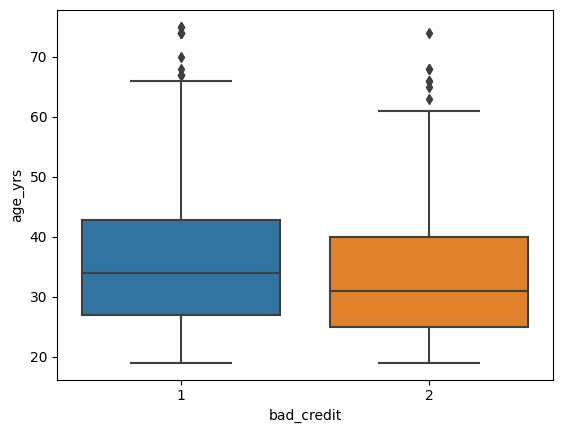

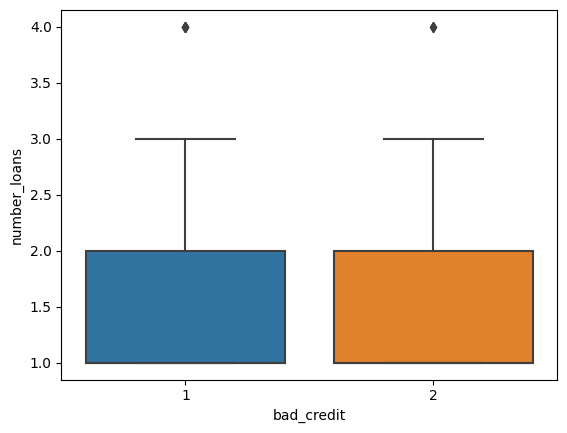

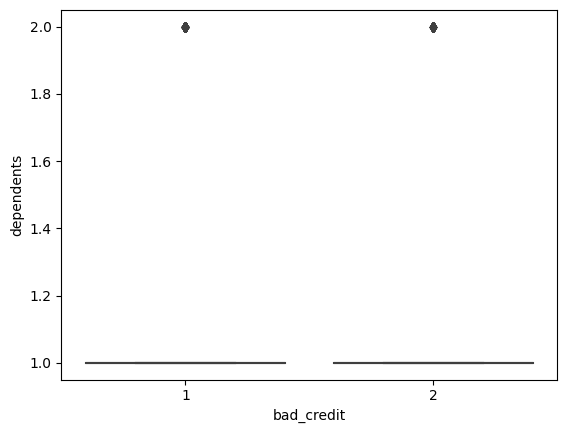

In [ ]:
print('數值資料於分類操作上不適合用散佈圖進行分析')
print('數值資料於分類操作上於hist也看不出來於不同分類上的差異')
list3=list1.copy()
list3.remove('bad_credit')
print(list3)
for i in list3:
  sns.boxplot(data=credit,x='bad_credit',y=i)
  plt.savefig('boxplot_'+i+'.png')
  plt.show()

文字資料可選擇長條圖，我們採用seaborn進行分組長條圖顯示
['checking_account_status', 'credit_history', 'purpose', 'savings_account_balance', 'time_employed_yrs', 'gender_status', 'other_signators', 'property', 'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 'foreign_worker']
A14    399
A11    276
A12    273
A13     64
Name: checking_account_status, dtype: int64

A32    540
A34    295
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64

A43     283
A40     237
A42     184
A41     106
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64

A61    612
A65    185
A62    104
A63     63
A64     48
Name: savings_account_balance, dtype: int64

A73    346
A75    254
A74    176
A72    173
A71     63
Name: time_employed_yrs, dtype: int64

A93    554
A92    314
A94     93
A91     51
Name: gender_status, dtype: int64

A101    916
A103     55
A102     41
Name: other_signators, dtype: int64

A123    335
A121    286
A122    234
A124    157

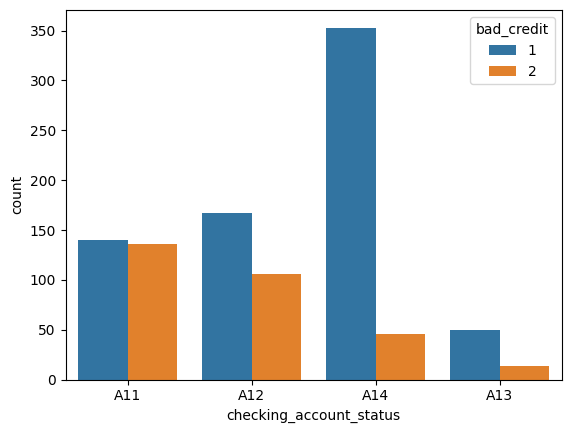

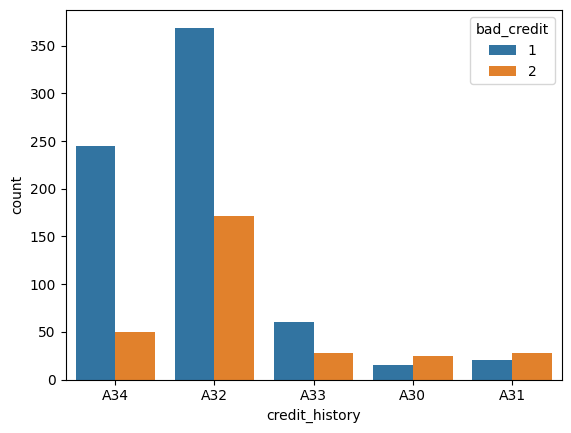

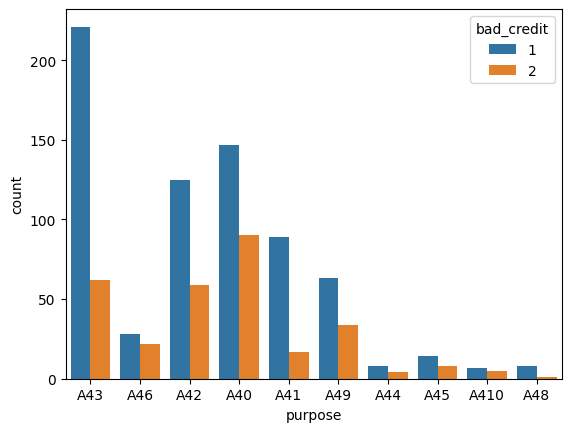

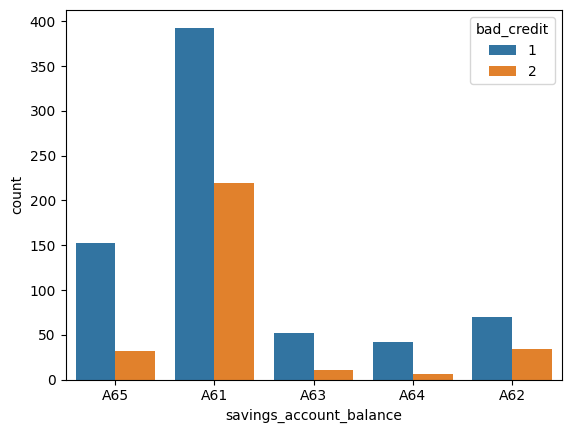

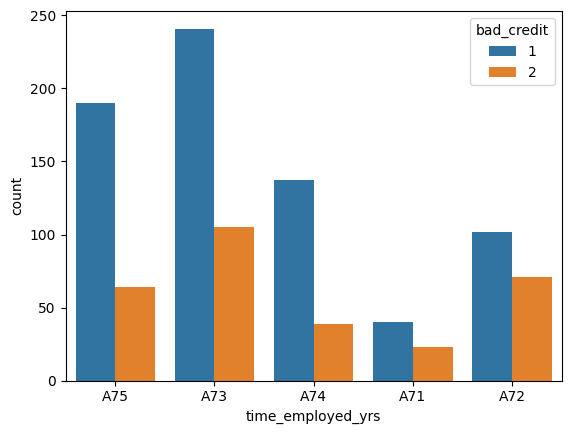

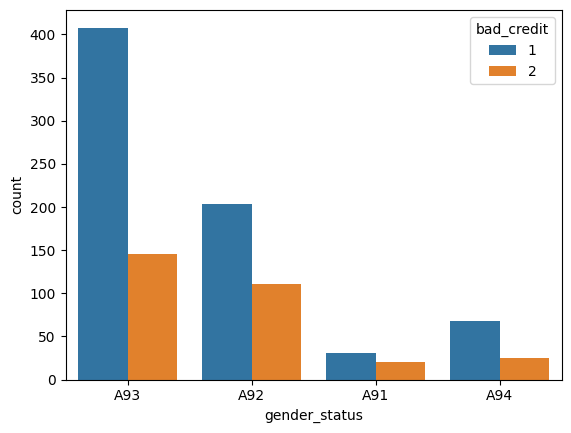

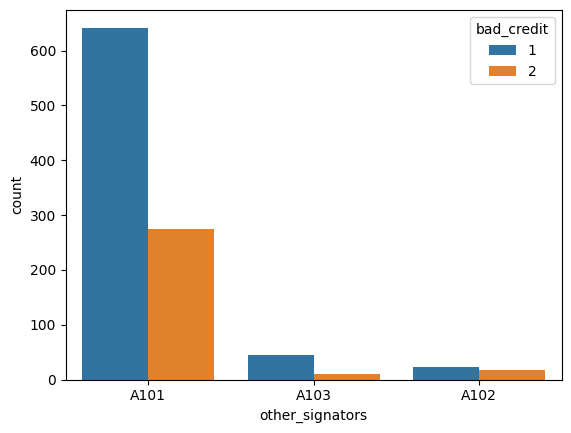

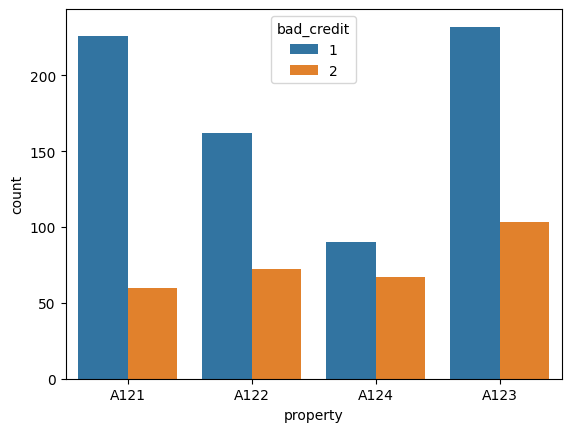

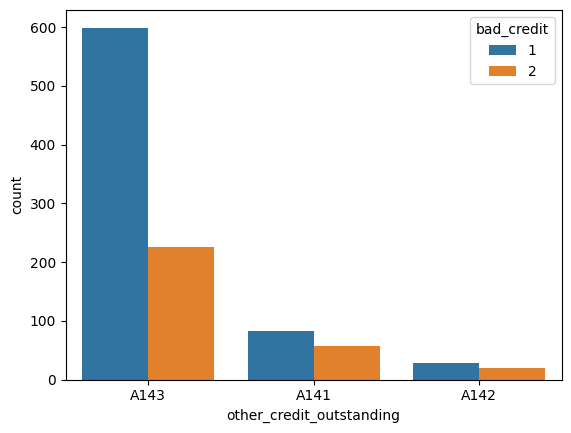

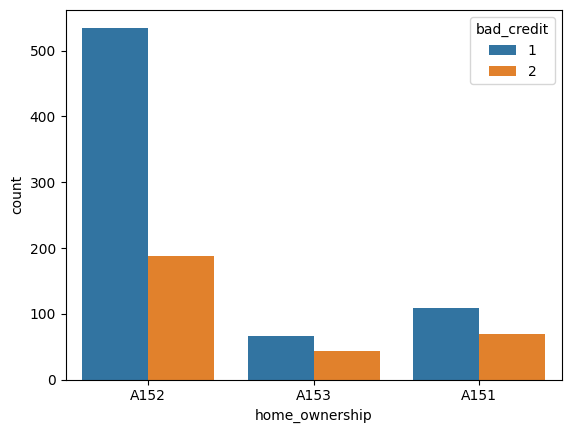

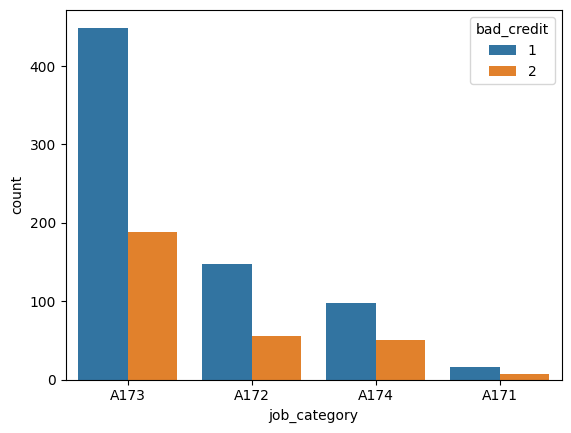

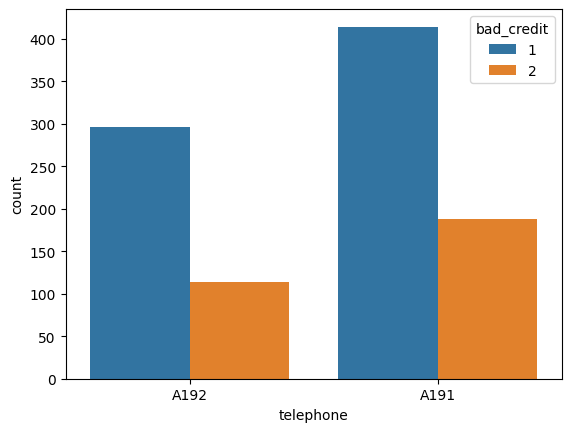

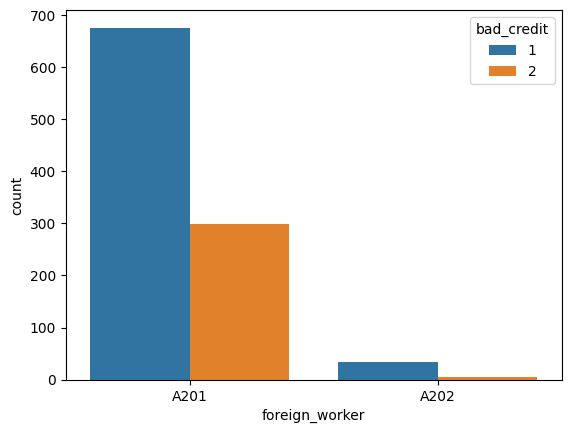

In [ ]:
print('文字資料可選擇長條圖，我們採用seaborn進行分組長條圖顯示')
print(list2)
for i in list2:
  print(credit[i].value_counts())
  print()
for i in list2:
  sns.countplot(x=i,data=credit,hue='bad_credit')
  plt.show()

In [ ]:
print(list3)
print('1-先區分X與y')
X=credit[list3]
#X=credit[['loan_duration_mo','loan_amount']]
y=credit['bad_credit']
print('2-進行資料切割')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print('3-開始進行模型訓練')
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
print('4-模型訓練後預測')
y_pred=model.predict(X_test)
print('預估結果')
print(y_pred)
print('正確結果')
print(y_test)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']
1-先區分X與y
2-進行資料切割
(708, 7)
(304, 7)
3-開始進行模型訓練
4-模型訓練後預測
預估結果
[1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 2 2
 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1
 2 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 1 1]
正確結果
660    1
129    2
957    1
403    1
281    1
      ..
601    2
523    2
741    1
251    1
20     1
Name: bad_credit, Length: 304, dtype: int64


In [ ]:
print('5-模型訓練後評估')
print('分類與迴歸的評估是不同')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('準確率:\n',accuracy_score(y_test,y_pred))
print('分類報告:\n',classification_report(y_test,y_pred))
print('混淆矩陣:\n',confusion_matrix(y_test,y_pred))


5-模型訓練後評估
分類與迴歸的評估是不同
準確率:
 0.6611842105263158
分類報告:
               precision    recall  f1-score   support

           1       0.74      0.82      0.78       222
           2       0.32      0.23      0.27        82

    accuracy                           0.66       304
   macro avg       0.53      0.53      0.52       304
weighted avg       0.63      0.66      0.64       304

混淆矩陣:
 [[182  40]
 [ 63  19]]
6-模型參數調整


In [ ]:
print('5a-輸入資料進行測試')
loan_duration_mo1=int(input('loan_duration_mo:'))
loan_amount1=int(input('loan_amount:'))
payment_pcnt_income1=int(input('payment_pcnt_income:'))
time_in_residence1=int(input('time_in_residence:'))
age_yrs1=int(input('age_yrs:'))
number_loans1=int(input('number_loans:'))
dependents1=int(input('dependents:'))
print('試著建立資料')
data={
 'loan_duration_mo':loan_duration_mo1,
 'loan_amount':loan_amount1,
 'payment_pcnt_income':payment_pcnt_income1,
 'time_in_residence':time_in_residence1,
 'age_yrs':age_yrs1,
 'number_loans':number_loans1,
 'dependents':dependents1
}
import pandas as pd
demo1=pd.DataFrame(data,index=[0])
y_pred2=model.predict(demo1)
print('預估結果')
print(y_pred2)

5a-輸入資料進行測試
loan_duration_mo:24
loan_amount:2603
payment_pcnt_income:2
time_in_residence:28
age_yrs:1
number_loans:1
dependents:1
試著建立資料
24
預估結果
[1]


模型參數做調整
[0.6199798792756539, 0.6793762575452716, 0.6524144869215293, 0.6779074446680081, 0.6679879275653924, 0.6948893360160966, 0.6792957746478874, 0.685010060362173, 0.6863983903420523, 0.6892957746478874, 0.6849496981891349, 0.6863983903420523, 0.6835412474849095, 0.6821327967806841, 0.6863179074446679, 0.6991348088531188, 0.6906237424547284, 0.696317907444668, 0.6991549295774648, 0.7019718309859155, 0.6991750503018108, 0.7019718309859155, 0.696317907444668, 0.696317907444668, 0.6935211267605634, 0.6949094567404427, 0.6892555331991952, 0.6977062374245473]


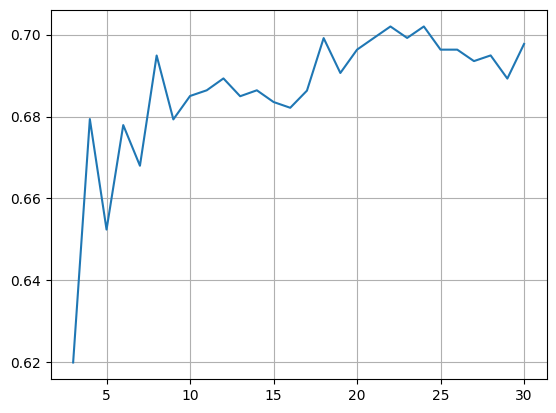

In [ ]:
print('模型參數做調整')
from sklearn.model_selection import cross_val_score
k_range=range(3,31)
k_scores=[]
for k_number in k_range:
  knn=KNeighborsClassifier(n_neighbors=k_number)
  score=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
  k_scores.append(score.mean())
print(k_scores)
import matplotlib.pyplot as plt
plt.plot(k_range,k_scores)
plt.grid()
plt.show()

In [ ]:
print('3-開始進行模型訓練')
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=22)
model.fit(X_train,y_train)
print('4-模型訓練後預測')
y_pred=model.predict(X_test)
print('預估結果')
print(y_pred)
print('正確結果')
print(y_test)
print('5-模型訓練後評估')
print('分類與迴歸的評估是不同')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('準確率:\n',accuracy_score(y_test,y_pred))
print('分類報告:\n',classification_report(y_test,y_pred))
print('混淆矩陣:\n',confusion_matrix(y_test,y_pred))


3-開始進行模型訓練
4-模型訓練後預測
預估結果
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1]
正確結果
660    1
129    2
957    1
403    1
281    1
      ..
601    2
523    2
741    1
251    1
20     1
Name: bad_credit, Length: 304, dtype: int64
5-模型訓練後評估
分類與迴歸的評估是不同
準確率:
 0.7236842105263158
分類報告:
               precision    recall  f1-score   support

           1       0.74      0.97      0.84       222
           2       0.42      0.06      0.11  